In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
task3 = pd.read_csv('IRIS.csv')

In [3]:
task3.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [4]:
print(task3.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
#basic stats
task3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
task3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#display of species
task3['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
#check for null values
task3.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

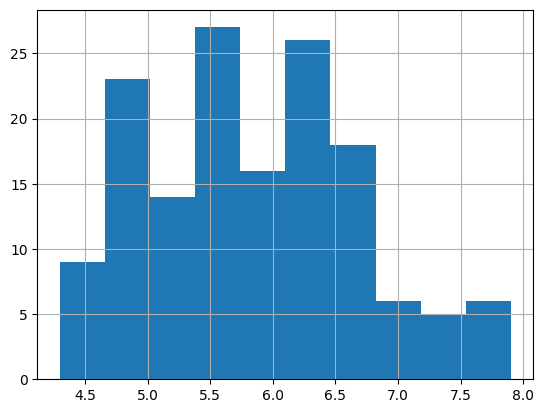

In [11]:
task3['sepal_length'].hist()

<Axes: >

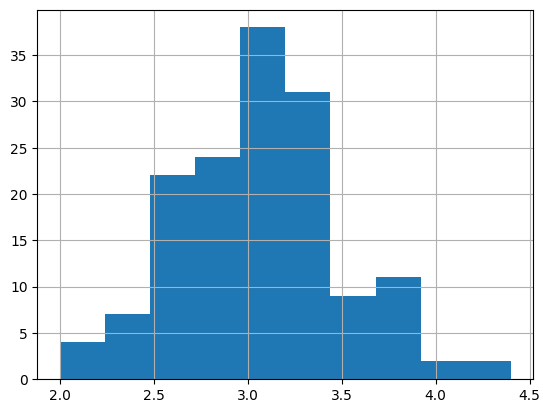

In [12]:
task3['sepal_width'].hist()

<Axes: >

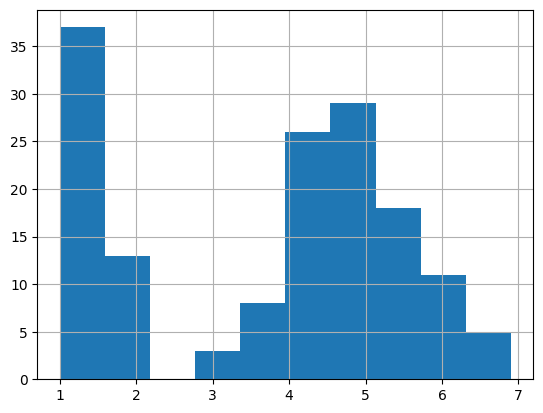

In [13]:
task3['petal_length'].hist()

<Axes: >

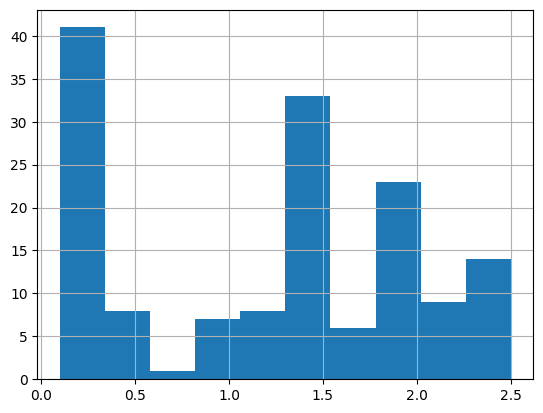

In [14]:
task3['petal_width'].hist()

In [17]:
colors = ['blue','green','red']
species =['Iris-setosa',
'Iris-versicolor',
'Iris-virginica']

Text(0, 0.5, 'Sepal Width')

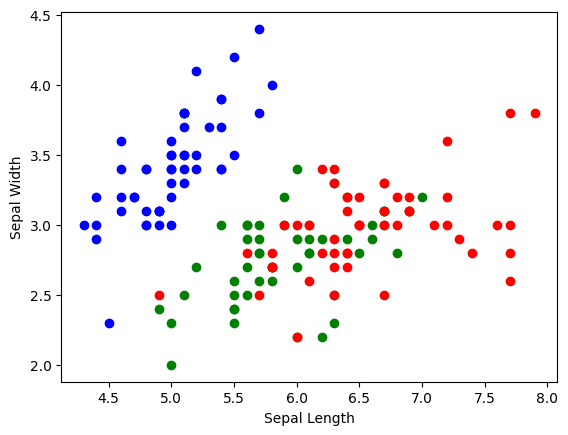

In [20]:
for i in range(3):
    x=task3[task3['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Text(0, 0.5, 'Petal Width')

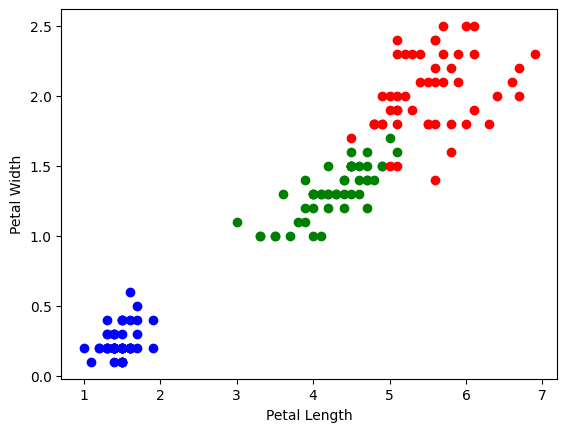

In [21]:
for i in range(3):
    x=task3[task3['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Text(0, 0.5, 'Petal Width')

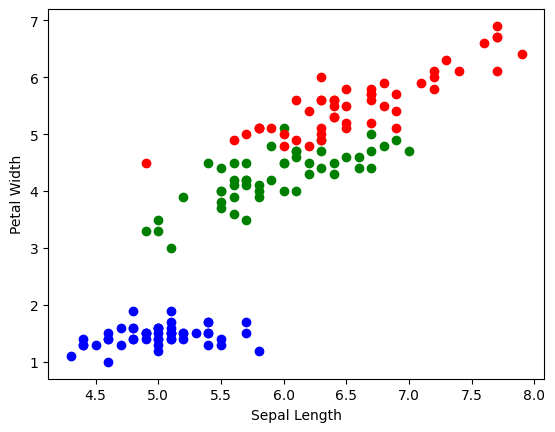

In [23]:
for i in range(3):
    x=task3[task3['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

Text(0, 0.5, 'Petal Width')

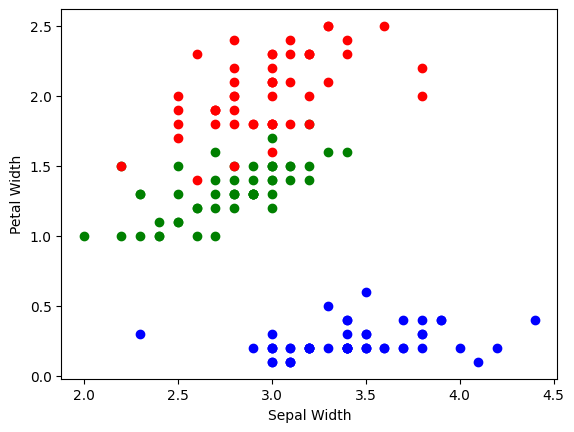

In [24]:
for i in range(3):
    x=task3[task3['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")

Text(0, 0.5, 'Petal Length')

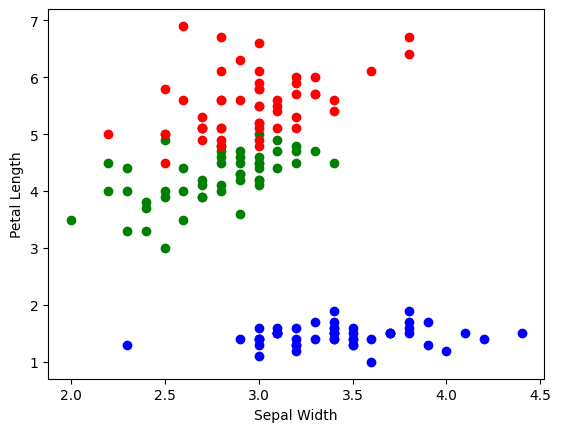

In [25]:
for i in range(3):
    x=task3[task3['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")

In [28]:
numeric_cols = task3.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

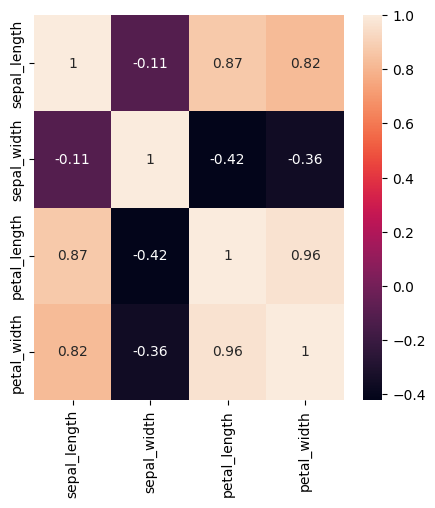

In [30]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
task3['species'] = le.fit_transform(task3['species'])
task3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
from sklearn.model_selection import train_test_split
X = task3.drop(columns=['species'])
Y=task3['species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X_test_indices = X_test.index

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
print("Accuracy:", model.score(X_test, y_test) * 100)


Accuracy: 97.77777777777777


In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test) * 100)

Accuracy: 95.55555555555556


In [62]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2,
       1])

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [64]:
importances = model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

In [66]:
results = pd.DataFrame({
    'index': X_test_indices,  # Use the preserved indices
    'species': y_pred
})

# Save the predictions to a CSV file
results.to_csv('IRIS_Classification.csv', index=False)

C:\Users\manas\AppData\Local\Temp\ipykernel_14436\623571766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


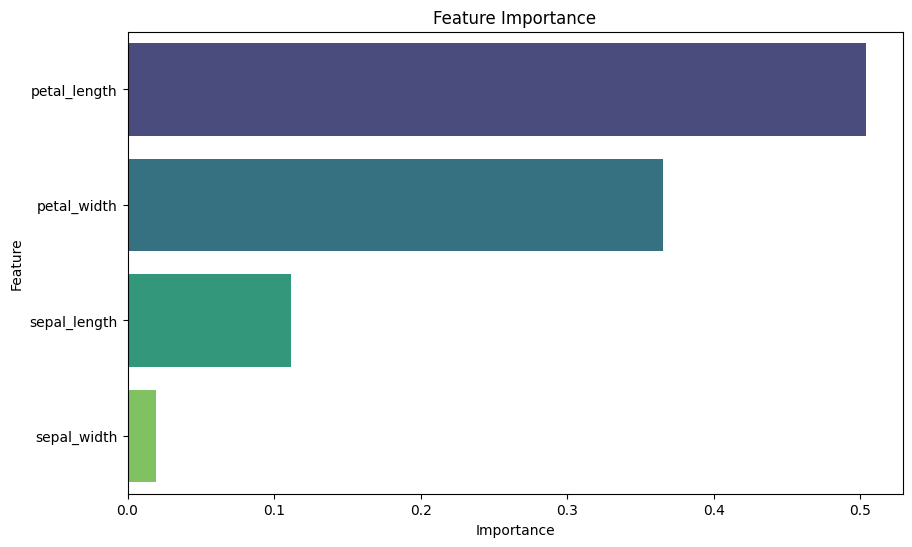

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()